Prediksi Pendapatan Individu Berdasarkan Data Sensus Menggunakan Algoritma Machine Learning

#judul


https://archive.ics.uci.edu/dataset/2/adult

Latar Belakang
Tingkat pendapatan seseorang merupakan salah satu indikator penting dalam mengukur kesejahteraan masyarakat. Pendapatan tersebut dipengaruhi oleh berbagai faktor seperti usia, tingkat pendidikan, jenis pekerjaan, jam kerja per minggu, hingga status pernikahan. Memahami keterkaitan antara faktor-faktor ini dengan penghasilan dapat membantu pemerintah, perusahaan, dan lembaga sosial dalam membuat kebijakan yang lebih tepat, seperti penentuan pajak, pemberian subsidi, atau program peningkatan keterampilan kerja.

Dataset Adult, yang juga dikenal sebagai Census Income Dataset, dikumpulkan oleh Biro Sensus Amerika Serikat pada tahun 1994 dan berisi data demografis lebih dari 48.000 individu. Dataset ini sering digunakan dalam studi machine learning, khususnya dalam kasus klasifikasi biner, untuk memprediksi apakah seseorang memiliki penghasilan lebih dari 50.000 dolar per tahun. Dengan memanfaatkan teknik machine learning, kita dapat membangun model prediktif yang tidak hanya akurat, tetapi juga memberikan wawasan tentang faktor-faktor penting yang memengaruhi pendapatan seseorang.

Permasalahan
Bagaimana cara memprediksi apakah seseorang memiliki penghasilan lebih dari 50.000 USD per tahun berdasarkan informasi demografis dan pekerjaan yang dimilikinya?

Tujuan
Membangun model klasifikasi berbasis machine learning untuk memprediksi tingkat pendapatan seseorang, serta mengetahui fitur-fitur (variabel) yang paling berpengaruh terhadap penghasilan.

Target Klasifikasi
Kolom target: income

Kelas:

- <=50K → pendapatan rendah

- >50K → pendapatan tinggi

Tipe masalah: Klasifikasi biner

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.preprocessing import StandardScaler

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
# Kolom berdasarkan file adult.names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

# Load data training
# Make sure the file path is correct relative to your mounted Google Drive
train_df = pd.read_csv("/content/drive/MyDrive/PORTOFOLIO KLASIFIKASI/adult/adult.data", header=None, names=columns, sep=",\s*", engine='python')

# Load data testing
# Make sure the file path is correct relative to your mounted Google Drive
test_df = pd.read_csv("/content/drive/MyDrive/PORTOFOLIO KLASIFIKASI/adult/adult.test", skiprows=1, header=None, names=columns, sep=",\s*", engine='python')

# Gabungkan jika ingin satu dataset besar
df = pd.concat([train_df, test_df], ignore_index=True)

# Display the head of the concatenated dataframe
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



age : Usia individu dalam tahun

workclass : Jenis pekerjaan atau kelas pekerjaan

fnlwgt : Final weight, mewakili jumlah orang dalam populasi yang memiliki karakteristik serupa

education : Tingkat pendidikan formal yang telah diselesaikan

education-num : Representasi numerik dari tingkat pendidikan

marital-status : Status pernikahan individu

occupation : Jenis pekerjaan spesifik yang dijalani

relationship : Hubungan individu dalam rumah tangga (misal: suami, anak, dll)

race : Ras atau kelompok etnis individu

sex : Jenis kelamin

capital-gain : Jumlah keuntungan modal yang diperoleh dalam setahun

capital-loss : Jumlah kerugian modal yang dialami dalam setahun

hours-per-week : Jumlah jam kerja per minggu

native-country : Negara asal individu

income : Target klasifikasi — apakah penghasilan individu lebih dari 50K per tahun atau tidak

#DATA CLEANING

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- memiliki 15 kolom

- memiliki 48842 baris


In [87]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [88]:
#value income
df['income'].value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


karna isi kolom income tidak biner maka saya akan merubah ke 0 dan 1 agar  mudah digunakan dalam proses machine learning

In [89]:
# Bersihkan spasi dan titik terlebih dulu
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

# Ubah ke 0 dan 1
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

karna isi pada terget income belum sesuai maka dari itu saya sesuaikan terlebih dahulu


In [90]:
#persentase income
df['income'].value_counts(normalize=True)

,proportion
income,
0,0.760718
1,0.239282


. Periksa dan Bersihkan Nilai Kosong atau Tidak Valid

In [91]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [92]:
#value workclass
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [93]:
# Cek jumlah nilai '?' di setiap kolom
for col in df.columns:
    print(col, (df[col] == '?').sum())

age 0
workclass 2799
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 2809
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0


In [94]:
#Menghapus Nilai '?' dari Kolom-Kolom Kategorikal
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

Menghapus nilai ? disetiap kolom

In [95]:
# Cek jumlah nilai '?' di setiap kolom
for col in df.columns:
    print(col, (df[col] == '?').sum())

age 0
workclass 0
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 0
income 0


In [96]:
#value workclass
df['workclass'].value_counts()

,count
workclass,
Private,33307
Self-emp-not-inc,3796
Local-gov,3100
State-gov,1946
Self-emp-inc,1646
Federal-gov,1406
Without-pay,21


In [97]:
#drop kolom education-num
df.drop('education-num', axis=1, inplace=True)

mendrop education-num karna saya ingin mengunakan kolom education saja agar lebih jelas urutan tingkatannya

In [98]:
#drop fnlwgt
df.drop('fnlwgt', axis=1, inplace=True)

mendrop fnlwgt karan tidak membutuhkan jumlah orang dalam populasi yang memiliki karakteristik serupa

#DATA MANIPULATION

In [99]:
df['education'].value_counts()

,count
education,
HS-grad,14783
Some-college,9899
Bachelors,7570
Masters,2514
Assoc-voc,1959
11th,1619
Assoc-acdm,1507
10th,1223
7th-8th,823


karna didalam kolom education ini memiliki banyak jenis education maka saya akan melakukan pengelompokan

In [100]:
#Mengurutkan education berdasarkan tingkatan
low_edu = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']
df['education'] = df['education'].replace(low_edu, 'Low-Education')

In [101]:
#Menggabungkan dua kategori associate (vocational dan academic) menjadi satu saja: 'Associate'.
df['education'] = df['education'].replace({
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate'
})

In [102]:
#urutan logis dari level pendidikan dari yang paling rendah ke paling tinggi. Tujuannya agar model bisa mengerti bahwa education memiliki sifat ordinal (bertingkat).
edu_order = ['Low-Education', 'HS-grad', 'Some-college', 'Associate',
             'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
df['education'] = pd.Categorical(df['education'], categories=edu_order, ordered=True)


In [103]:
#value education
df['education'].value_counts()

,count
education,
HS-grad,14783
Some-college,9899
Bachelors,7570
Low-Education,5661
Associate,3466
Masters,2514
Prof-school,785
Doctorate,544


In [104]:
#value marital-status
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,21055
Never-married,14598
Divorced,6297
Separated,1411
Widowed,1277
Married-spouse-absent,552
Married-AF-spouse,32


In [105]:
#Menggabungkan Status Pernikahan yang Jarang
df['marital-status'] = df['marital-status'].replace(
    ['Married-AF-spouse', 'Married-spouse-absent', 'Separated', 'Widowed'],
    'Other'
)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  object  
 2   education       45222 non-null  category
 3   marital-status  45222 non-null  object  
 4   occupation      45222 non-null  object  
 5   relationship    45222 non-null  object  
 6   race            45222 non-null  object  
 7   sex             45222 non-null  object  
 8   capital-gain    45222 non-null  int64   
 9   capital-loss    45222 non-null  int64   
 10  hours-per-week  45222 non-null  int64   
 11  native-country  45222 non-null  object  
 12  income          45222 non-null  int64   
dtypes: category(1), int64(5), object(7)
memory usage: 4.5+ MB


#EDA

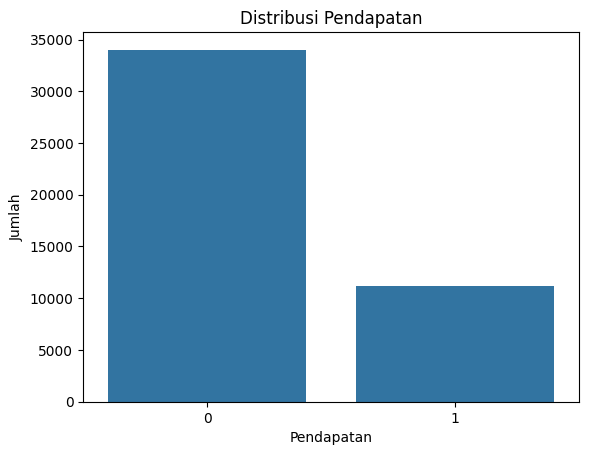

In [107]:
#1. Distribusi Kelas pada Target income
sns.countplot(data=df, x='income')
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah')
plt.show()

Mayoritas individu dalam dataset memiliki pendapatan kurang dari atau sama dengan 50K USD, menunjukkan ketidakseimbangan kelas pada target.

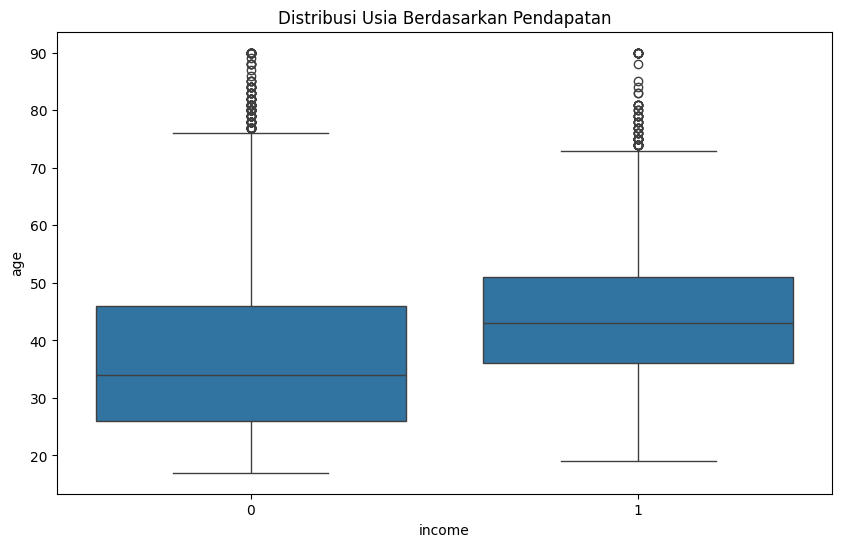

In [108]:
# Usia vs Pendapatan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Distribusi Usia Berdasarkan Pendapatan')
plt.show()

Kelompok dengan pendapatan >50K cenderung berusia lebih tua dan memiliki lebih banyak outlier usia dibanding kelompok <=50K.

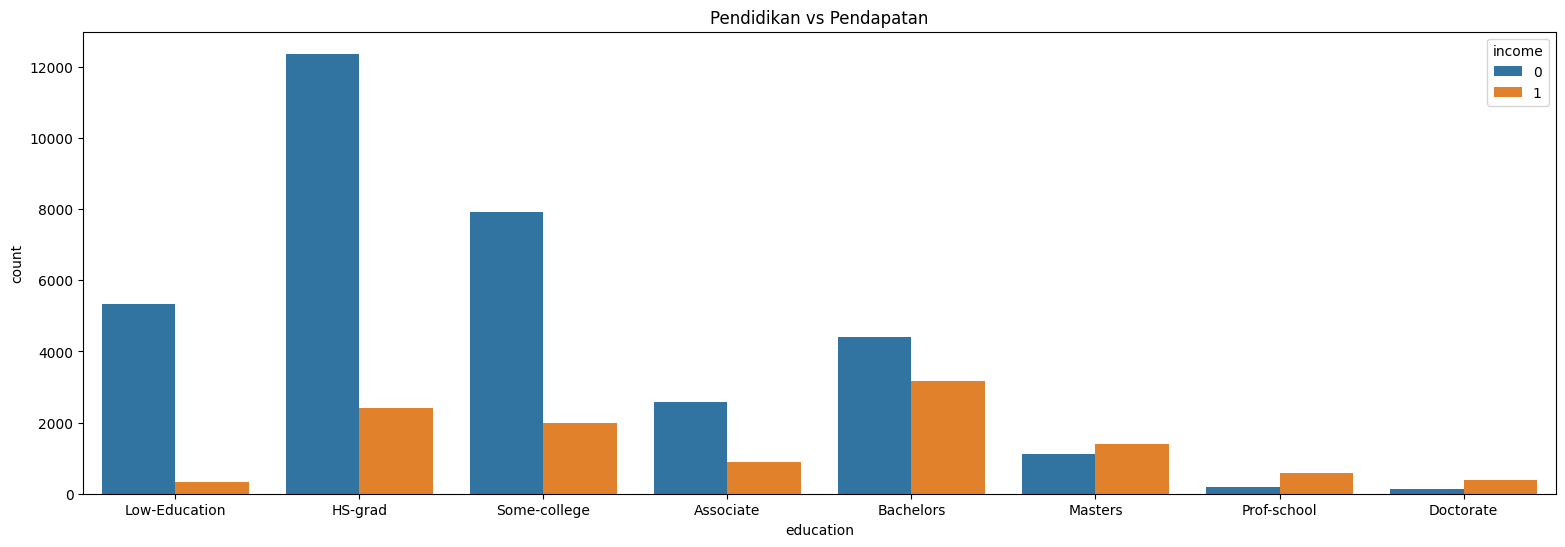

In [109]:
#Pendidikan vs Pendapatan
plt.figure(figsize=(19, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Pendidikan vs Pendapatan')
plt.show()

Kelompok dengan pendidikan HS-grad merupakan yang paling dominan, terutama pada kategori pendapatan <=50K.

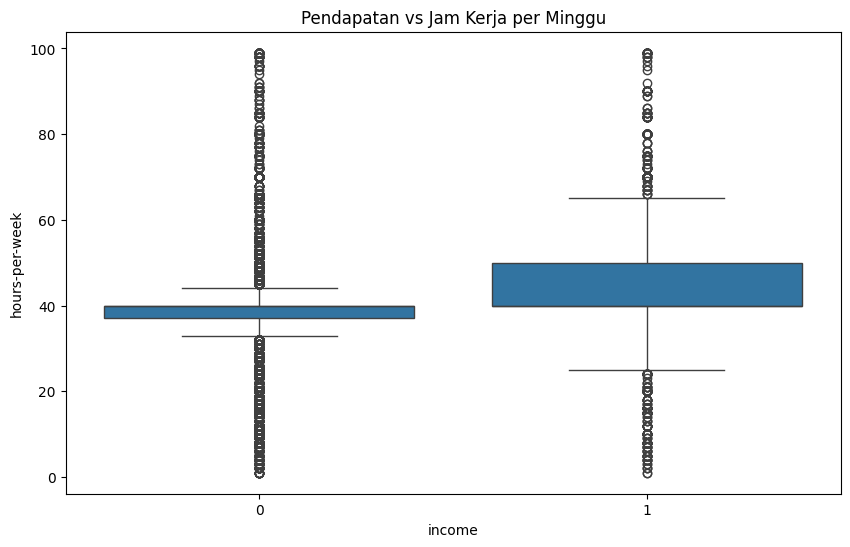

In [110]:
#jam Kerja per Minggu vs Pendapatan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Pendapatan vs Jam Kerja per Minggu')
plt.show()

Kelompok dengan pendapatan >50K cenderung bekerja lebih lama per minggu dan memiliki lebih banyak outlier jam kerja dibanding kelompok <=50K.

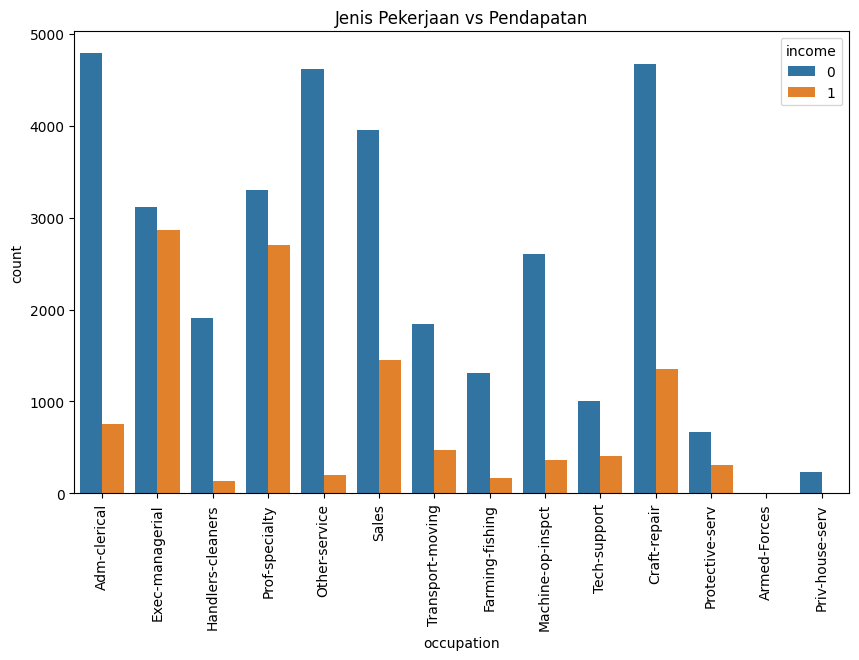

In [111]:
#Jenis Pekerjaan (Occupation) vs Pendapatan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Jenis Pekerjaan vs Pendapatan')
plt.xticks(rotation=90)
plt.show()

Pekerjaan di bidang manajerial dan profesional memiliki proporsi tertinggi dalam pendapatan >50K dibandingkan pekerjaan lainnya.

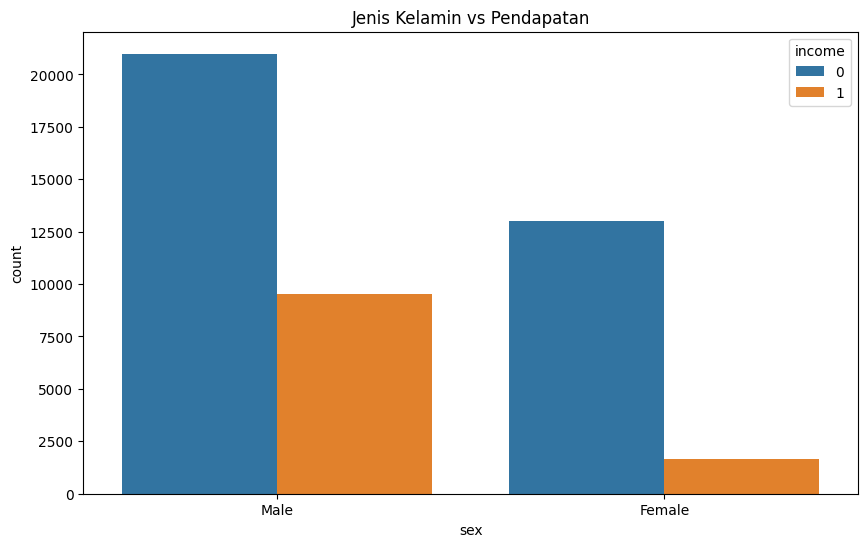

In [112]:
#Jenis Kelamin vs Pendapatan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Jenis Kelamin vs Pendapatan')
plt.show()

Individu berjenis kelamin laki-laki (male) mendominasi baik pada kelompok pendapatan <=50K maupun >50K dibanding perempuan.

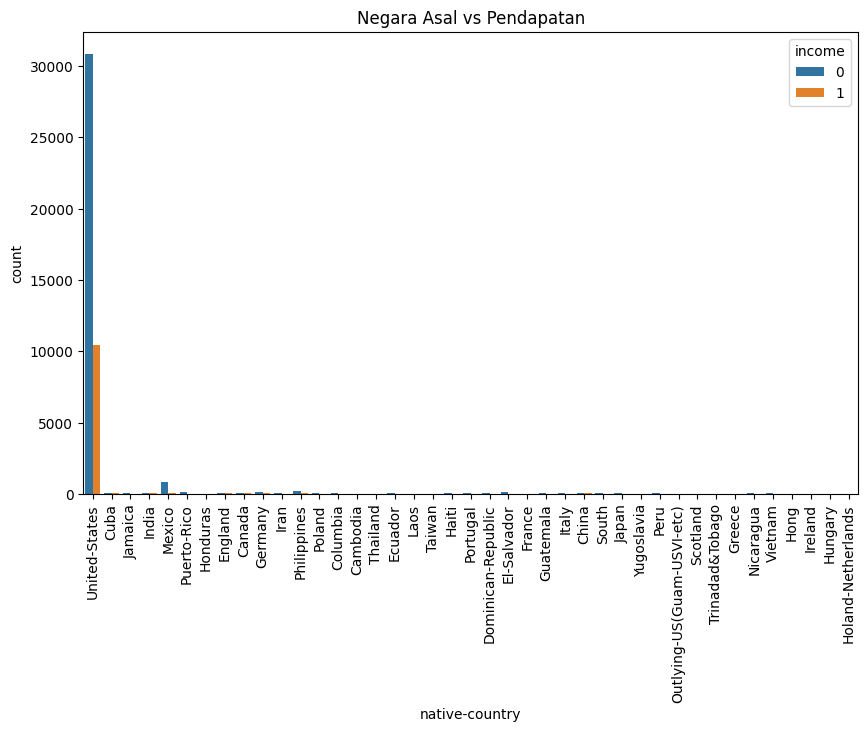

In [113]:
#Negara Asal vs Pendapatan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='native-country', hue='income')
plt.title('Negara Asal vs Pendapatan')
plt.xticks(rotation=90)
plt.show()


Mayoritas individu berpendapatan tinggi berasal dari Amerika Serikat, menunjukkan dominasi ekonomi domestik dalam dataset ini.

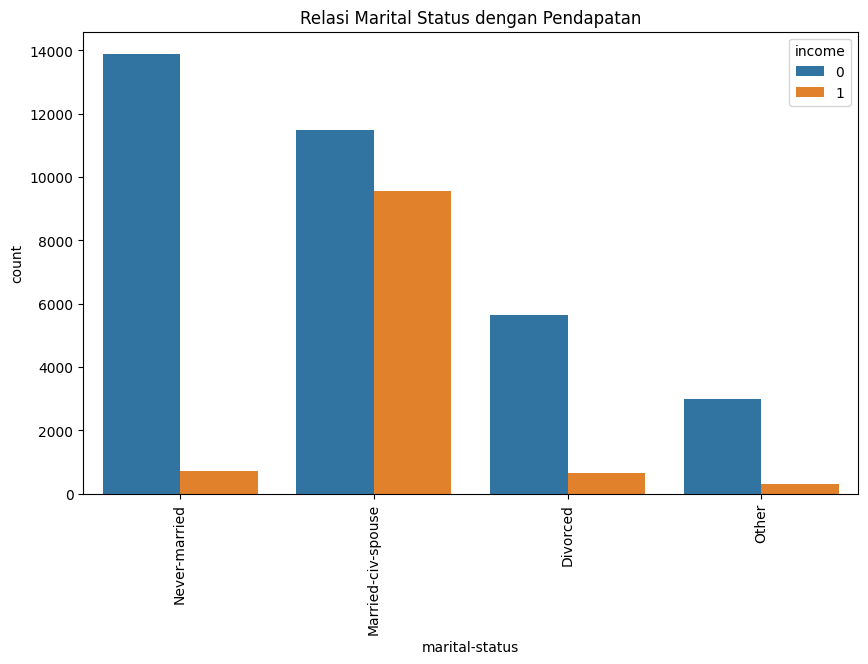

In [114]:
#Relasi Marital Status dengan Pendapatan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital-status', hue='income')
plt.title('Relasi Marital Status dengan Pendapatan')
plt.xticks(rotation=90)
plt.show()

Individu yang sudah menikah cenderung memiliki pendapatan tinggi dibandingkan status pernikahan lainnya.

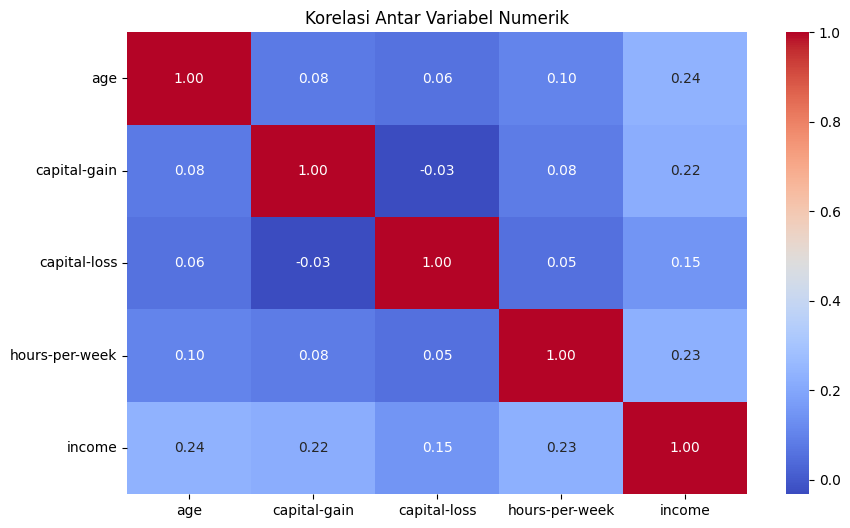

In [115]:
#EDA Multivariate
#Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 2. Tambahkan kolom konstanta (intercept) untuk keperluan VIF
X = add_constant(df_numeric)

# 3. Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Tampilkan hasil
vif_data

,Feature,VIF
0,const,19.954147
1,age,1.063778
2,capital-gain,1.058479
3,capital-loss,1.028538
4,hours-per-week,1.058920
5,income,1.177510


tidak ada yang di drop karna VIF <= 5

#Feature Engineering:
Mengubah data mentah menjadi fitur yang lebih informatif atau relevan.

Meningkatkan kinerja model klasifikasi income (0/1).

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  object  
 2   education       45222 non-null  category
 3   marital-status  45222 non-null  object  
 4   occupation      45222 non-null  object  
 5   relationship    45222 non-null  object  
 6   race            45222 non-null  object  
 7   sex             45222 non-null  object  
 8   capital-gain    45222 non-null  int64   
 9   capital-loss    45222 non-null  int64   
 10  hours-per-week  45222 non-null  int64   
 11  native-country  45222 non-null  object  
 12  income          45222 non-null  int64   
dtypes: category(1), int64(5), object(7)
memory usage: 4.5+ MB


In [118]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,Low-Education,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [119]:
#Kelompok umur bisa lebih informatif daripada angka asli:
#df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])

In [120]:
#drop kolom age
#df.drop('age', axis=1, inplace=True)

In [121]:
#Gabungan antara capital-gain dan capital-loss — nilai bersih.
df['net_capital'] = df['capital-gain'] - df['capital-loss']

In [122]:
#drop kolom capital-gain capital-loss
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [123]:
#Kalau jam kerja lebih dari 40, kemungkinan pendapatan lebih tinggi.
df['is_overtime'] = df['hours-per-week'].apply(lambda x: 1 if x > 40 else 0)

In [124]:
#Gabungkan hubungan keluarga. Semakin banyak tanggungan, bisa berpengaruh ke kebutuhan kerja atau pendapatan.
df['family_size'] = df['marital-status'].apply(lambda x: 1 if x in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)

In [125]:
#value net_capita
#df['net_capital'].value_counts()

In [126]:
#Fitur baru berdasarkan kategori workclass, apakah seseorang bekerja sendiri atau bukan:
df['is_self_employed'] = df['workclass'].apply(lambda x: 1 if 'Self-emp' in x else 0)

In [127]:
#drop kolom workclass
df.drop('workclass', axis=1, inplace=True)

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil semua kolom numerik (int, float, dan bool)
numeric_df = df.select_dtypes(include=[np.number])

# Hitung korelasi dengan target
correlation = numeric_df.corr()['income'].sort_values(ascending=False)

print("Korelasi fitur ke target ('income'):")
print(correlation)

Korelasi fitur ke target ('income'):
income              1.000000
family_size         0.446192
is_overtime         0.239740
age                 0.237040
hours-per-week      0.227199
net_capital         0.212337
is_self_employed    0.097949
Name: income, dtype: float64


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64'])

# Hitung korelasi dengan target
correlation = numeric_df.corr()['income'].sort_values(ascending=False)
print("Korelasi fitur ke target (income'):")
print(correlation)

Korelasi fitur ke target (income'):
income              1.000000
family_size         0.446192
is_overtime         0.239740
age                 0.237040
hours-per-week      0.227199
net_capital         0.212337
is_self_employed    0.097949
Name: income, dtype: float64


In [130]:
#drop fnlwgt
#df.drop('fnlwgt', axis=1, inplace=True)

mendrop fnlwgt	karan tidak membutuhkan  jumlah orang dalam populasi yang memiliki karakteristik serupa

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45222 non-null  int64   
 1   education         45222 non-null  category
 2   marital-status    45222 non-null  object  
 3   occupation        45222 non-null  object  
 4   relationship      45222 non-null  object  
 5   race              45222 non-null  object  
 6   sex               45222 non-null  object  
 7   hours-per-week    45222 non-null  int64   
 8   native-country    45222 non-null  object  
 9   income            45222 non-null  int64   
 10  net_capital       45222 non-null  int64   
 11  is_overtime       45222 non-null  int64   
 12  family_size       45222 non-null  int64   
 13  is_self_employed  45222 non-null  int64   
dtypes: category(1), int64(7), object(6)
memory usage: 4.9+ MB


#Outlier Handling

In [132]:
#kolom yang int
#numeric_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss', 'is_self_employed']

In [133]:
#kolom yang int
numeric_cols = ['age', 'hours-per-week']

In [134]:
#kolom yang int
#numeric_cols = ['age', 'hours-per-week']

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45222 non-null  int64   
 1   education         45222 non-null  category
 2   marital-status    45222 non-null  object  
 3   occupation        45222 non-null  object  
 4   relationship      45222 non-null  object  
 5   race              45222 non-null  object  
 6   sex               45222 non-null  object  
 7   hours-per-week    45222 non-null  int64   
 8   native-country    45222 non-null  object  
 9   income            45222 non-null  int64   
 10  net_capital       45222 non-null  int64   
 11  is_overtime       45222 non-null  int64   
 12  family_size       45222 non-null  int64   
 13  is_self_employed  45222 non-null  int64   
dtypes: category(1), int64(7), object(6)
memory usage: 4.9+ MB


In [136]:
#mau melihat value dari numeric_cols
df[numeric_cols].describe()

,age,hours-per-week
count,45222.000000,45222.000000
mean,38.547941,40.938017
std,13.217870,12.007508
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


In [137]:
#value is_self_employed
df['is_self_employed'].value_counts()

,count
is_self_employed,
0,39780
1,5442


is_self_employed	tidak perlu dihandling outlier karan dia biner

In [138]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (df[numeric_cols] < lower) | (df[numeric_cols] > upper)
outlier_count = outlier.sum(axis=0)
print(f'Jumlah baris outliers')
print(outlier_count)

Jumlah baris outliers
age                 269
hours-per-week    11899
dtype: int64


In [139]:
df[numeric_cols] = df[numeric_cols].clip(lower=lower, upper=upper, axis=1)

In [140]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (df[numeric_cols] < lower) | (df[numeric_cols] > upper)
outlier_count = outlier.sum(axis=0)
print(f'Jumlah baris outliers')
print(outlier_count)

Jumlah baris outliers
age               0
hours-per-week    0
dtype: int64


In [141]:
df['income'].value_counts()

,count
income,
0,34014
1,11208


#ENCODING

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45222 non-null  float64 
 1   education         45222 non-null  category
 2   marital-status    45222 non-null  object  
 3   occupation        45222 non-null  object  
 4   relationship      45222 non-null  object  
 5   race              45222 non-null  object  
 6   sex               45222 non-null  object  
 7   hours-per-week    45222 non-null  float64 
 8   native-country    45222 non-null  object  
 9   income            45222 non-null  int64   
 10  net_capital       45222 non-null  int64   
 11  is_overtime       45222 non-null  int64   
 12  family_size       45222 non-null  int64   
 13  is_self_employed  45222 non-null  int64   
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 4.9+ MB




marital-status : Status pernikahan individu

occupation : Jenis pekerjaan spesifik yang dijalani

relationship : Hubungan individu dalam rumah tangga (misal: suami, anak, dll)

race : Ras atau kelompok etnis individu

sex : Jenis kelamin

native-country : Negara asal individu


In [143]:
from sklearn.preprocessing import LabelEncoder

# 1. One-Hot Encoding (jumlah kategori sedikit, tidak berurutan)
onehot_cols = ['marital-status', 'relationship', 'race']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# 2. Label Encoding untuk kolom biner (sex)
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # Female = 0, Male = 1 (default sklearn)

# 3. Mean Encoding untuk kolom dengan banyak kategori
mean_enc_cols = ['native-country', 'occupation']
for col in mean_enc_cols:
    mean_map = df.groupby(col)['income'].mean()
    df[col + '_mean_enc'] = df[col].map(mean_map)

# 4. Drop kolom asli setelah encoding
df.drop(columns=mean_enc_cols, inplace=True)

One-Hot Encoding (marital-status, relationship, race): Karena jumlah kategorinya sedikit dan tidak berurutan, sehingga cocok direpresentasikan dalam bentuk kolom biner.

Label Encoding (sex): Karena hanya terdiri dari dua kategori (biner), jadi cukup efisien dengan pengkodean numerik 0 dan 1.

Mean Encoding (occupation, native-country): Karena kategorinya banyak, mean encoding digunakan untuk mengurangi dimensi tanpa kehilangan informasi yang berkaitan dengan target.

In [144]:
# Pastikan education dan age_group bertipe kategori dulu (kalau belum)
df['education'] = df['education'].astype('category')
#df['age_group'] = df['age_group'].astype('category')

# Ubah ke kode numerik
df['education'] = df['education'].cat.codes
#df['age_group'] = df['age_group'].cat.codes

In [167]:
#value untuk semua category dan object
for col in df.columns:
    print(col, df[col].unique())

age [39.  50.  38.  53.  28.  37.  49.  52.  31.  42.  30.  23.  32.  34.
 25.  43.  40.  54.  35.  59.  56.  19.  20.  45.  22.  48.  21.  24.
 57.  44.  41.  29.  47.  46.  36.  75.5 27.  18.  33.  55.  61.  70.
 64.  71.  66.  51.  58.  26.  17.  60.  75.  65.  62.  63.  67.  74.
 72.  69.  68.  73. ]
education [4 1 0 5 2 3 7 6]
sex [1 0]
hours-per-week [40.  32.5 45.  50.  52.5 35.  52.  44.  43.  38.  48.  41.  36.  46.
 42.  34.  33.  47.  37.  39.  49.  51. ]
income [0 1]
net_capital [ 2174     0 14084  5178 -2042 -1408 -1902  5013  2407 14344 15024  7688
 -1887  4064 -1719 -1762  4386 -1564 -2179 -1816 -1980 -1977  7298 -1876
 -1340 -2206  1409  3674 -1741  1055 -1485  2050 -2339 -2415  2176   594
 -1380 20051  6849  4101  8614  3411 -1721  2597 25236 -2051  4650 -2377
 -1669 -2352  2463  3103 -1672  -653 10605 -2392  2964  3325 -1504  2580
  3471 -1590 -1651  4865 99999  6514 -1628  1471  2329 -1848  2105 -2001
  2885 10520 -1740  2202 -2002  2961 27828  6767  2228 -1579  1506

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#Model Training

In [146]:
# Pisahkan fitur dan target
X = df.drop(['income'],axis = 1)
y = df['income']

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
# Menampilkan ukuran dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (36177, 22)
Shape of X_test: (9045, 22)


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                45222 non-null  float64
 1   education                          45222 non-null  int8   
 2   sex                                45222 non-null  int64  
 3   hours-per-week                     45222 non-null  float64
 4   income                             45222 non-null  int64  
 5   net_capital                        45222 non-null  int64  
 6   is_overtime                        45222 non-null  int64  
 7   family_size                        45222 non-null  int64  
 8   is_self_employed                   45222 non-null  int64  
 9   marital-status_Married-civ-spouse  45222 non-null  bool   
 10  marital-status_Never-married       45222 non-null  bool   
 11  marital-status_Other               45222 non-null  bool   


#SMOTE

In [149]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  # Tambahkan ini
import pandas as pd

# Function to create pipeline with SMOTE
def create_pipeline_smote(model, col):
    processor = ColumnTransformer(
        transformers=[('columns', StandardScaler(), col)]
    )
    pipeline_smote = ImbPipeline(steps=[
        ('preprocessor', processor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    return pipeline_smote

# Function to evaluate models
def metric_smote(X_train, y_train, X_test, y_test, col):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBOOST': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'Naive Bayes': GaussianNB(),  # Ganti dari LightGBM ke Naive Bayes
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }

    results = []
    for name, model in models.items():
        pipeline_smote = create_pipeline_smote(model, col)

        scoring = {'precision': 'precision',
                   'recall': 'recall',
                   'f1': 'f1',
                   'accuracy': 'accuracy'}

        crossvalidation = cross_validate(pipeline_smote, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        pipeline_smote.fit(X_train, y_train)
        y_test_pred = pipeline_smote.predict(X_test)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model_SMOTE': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    result_metrics_smote = pd.DataFrame(results)
    result_metrics_smote = result_metrics_smote.sort_values(by=['Test F1'], ascending=False)
    return result_metrics_smote

# Jalankan fungsinya
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
result_metrics_smote = metric_smote(X_train, y_train, X_test, y_test, num_cols)

# Tampilkan hasil
result_metrics_smote


,Model_SMOTE,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
2,XGBOOST,0.642642,0.781284,0.705192,0.838102,0.628582,0.782783,0.697259,0.831509
1,Random Forest,0.619106,0.689717,0.652470,0.817923,0.612310,0.683318,0.645868,0.814262
4,Logistic Regression,0.537895,0.824561,0.651045,0.780938,0.531407,0.803747,0.639801,0.775677
0,Decision Tree,0.609907,0.645551,0.627184,0.809824,0.617102,0.653434,0.634749,0.813599
3,Naive Bayes,0.610697,0.580415,0.595136,0.804268,0.599620,0.562444,0.580437,0.798452


model terbaiknya adalah XGBOOST karna memiliki test F1 0.69 paling tertinggi diantara model lainnya

#Hypertuning Parameters

In [150]:
!pip install optuna

In [151]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  # Gantikan LightGBM
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import optuna

# Function to create pipeline with SMOTE
def create_pipeline_with_smote(model):
    return ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Untuk menyimpan hasil terbaik
best_params_permodel = {}
best_value_permodel = {}

def tuning(trial):
    models = trial.suggest_categorical(
        'model',
        ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST', 'NaiveBayes', 'LogisticRegression']  # Ganti 'LightGBM' dengan 'NaiveBayes'
    )

    if models == 'LogisticRegression':
        params = {
            'C': trial.suggest_float('C', 0.01, 10.0, log=True),
            'max_iter': trial.suggest_int('max_iter', 100, 500)
        }
        model = LogisticRegression(**params, random_state=42)

    elif models == 'DecisionTreeClassifier':
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
        }
        model = DecisionTreeClassifier(**params, random_state=42)

    elif models == 'RandomForestClassifier':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
        }
        model = RandomForestClassifier(**params, random_state=42)

    elif models == 'XGBOOST':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 10)
        }
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)

    elif models == 'NaiveBayes':
        params = {}  # GaussianNB tidak butuh hyperparameter
        model = GaussianNB()

    # Buat pipeline + SMOTE
    pipeline = create_pipeline_with_smote(model)

    # Evaluasi pakai F1-score CV
    train_f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    # Simpan hasil terbaik per model
    if models not in best_value_permodel or train_f1 > best_value_permodel[models]:
        best_value_permodel[models] = train_f1
        best_params_permodel[models] = params

    return train_f1

# Buat dan jalankan optimasi
study = optuna.create_study(direction='maximize')
study.optimize(tuning, n_trials=50)

# Output hasil terbaik
print("\nBest Trial Overall:", study.best_trial)
print("\nBest Hyperparameters per Model:")
for model_name, params in best_params_permodel.items():
    print(f"{model_name}: {params}")
print("\nBest F1 Score per Model:")
for model_name, score in best_value_permodel.items():
    print(f"{model_name}: {score:.4f}")


[I 2025-06-29 11:12:29,725] A new study created in memory with name: no-name-a56a3f4b-13c4-4677-880b-d578b790c815
[I 2025-06-29 11:12:34,083] Trial 0 finished with value: 0.6203319606457764 and parameters: {'model': 'NaiveBayes'}. Best is trial 0 with value: 0.6203319606457764.
[I 2025-06-29 11:12:38,888] Trial 1 finished with value: 0.6203319606457764 and parameters: {'model': 'NaiveBayes'}. Best is trial 0 with value: 0.6203319606457764.
[I 2025-06-29 11:12:52,723] Trial 2 finished with value: 0.6700388338604079 and parameters: {'model': 'LogisticRegression', 'C': 0.08604539633686684, 'max_iter': 268}. Best is trial 2 with value: 0.6700388338604079.
[I 2025-06-29 11:13:02,864] Trial 3 finished with value: 0.6689654774860883 and parameters: {'model': 'LogisticRegression', 'C': 0.011829220494761768, 'max_iter': 153}. Best is trial 2 with value: 0.6700388338604079.
[I 2025-06-29 11:13:09,175] Trial 4 finished with value: 0.6835791964780618 and parameters: {'model': 'DecisionTreeClassifi


Best Trial Overall: FrozenTrial(number=33, state=1, values=[0.7194087771477145], datetime_start=datetime.datetime(2025, 6, 29, 11, 16, 7, 726383), datetime_complete=datetime.datetime(2025, 6, 29, 11, 16, 15, 388207), params={'model': 'XGBOOST', 'n_estimators': 158, 'learning_rate': 0.15696833345377012, 'max_depth': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'model': CategoricalDistribution(choices=('DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST', 'NaiveBayes', 'LogisticRegression')), 'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1)}, trial_id=33, value=None)

Best Hyperparameters per Model:
NaiveBayes: {}
LogisticRegression: {'C': 7.399643784313297, 'max_iter': 492}
DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
RandomForestClassifier: {'n

In [152]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  # Gantikan LightGBM
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Create pipeline with SMOTE
def create_pipeline_with_smote(model):
    return ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Main function using best params
def model_best_param(X_train, y_train, X_test, y_test, best_params_permodel):
    models = {
        'LogisticRegression': LogisticRegression,
        'DecisionTreeClassifier': DecisionTreeClassifier,
        'RandomForestClassifier': RandomForestClassifier,
        'XGBOOST': XGBClassifier,
        'NaiveBayes': GaussianNB  # Ganti LightGBM ke NaiveBayes
    }

    results = []
    for name, permodel in models.items():
        # Apply best parameters
        if name in best_params_permodel:
            params = best_params_permodel[name]
        else:
            params = {}

        # Tambahkan random_state jika ada
        if 'random_state' in permodel().get_params().keys():
            params['random_state'] = 42

        model = permodel(**params)

        # Pipeline
        pipeline = create_pipeline_with_smote(model)

        # CV scores
        scoring = {'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'accuracy': 'accuracy'}
        crossvalidation = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict(X_test)

        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    results_tuning_smote = pd.DataFrame(results)
    results_tuning_smote = results_tuning_smote.sort_values(by='Test F1', ascending=False)

    return results_tuning_smote

# Jalankan evaluasi
results_tuning_smote = model_best_param(X_train, y_train, X_test, y_test, best_params_permodel)
results_tuning_smote

,Model,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,XGBOOST,0.677239,0.767343,0.719409,0.851646,0.679327,0.773863,0.723520,0.853400
1,DecisionTreeClassifier,0.635086,0.752957,0.688957,0.831523,0.636701,0.764496,0.694771,0.833499
2,RandomForestClassifier,0.575121,0.841625,0.683289,0.806645,0.571956,0.829616,0.677102,0.803870
0,LogisticRegression,0.575551,0.803592,0.670695,0.804434,0.574289,0.793042,0.666167,0.802985
4,NaiveBayes,0.487941,0.851327,0.620332,0.741715,0.488012,0.844335,0.618526,0.741846


Model terbaik adalah XGBOOST karena memiliki F1 Score tertinggi (0.717449) dan juga akurasi tertinggi (0.846213) pada data uji (test),

#Confusion Metrics

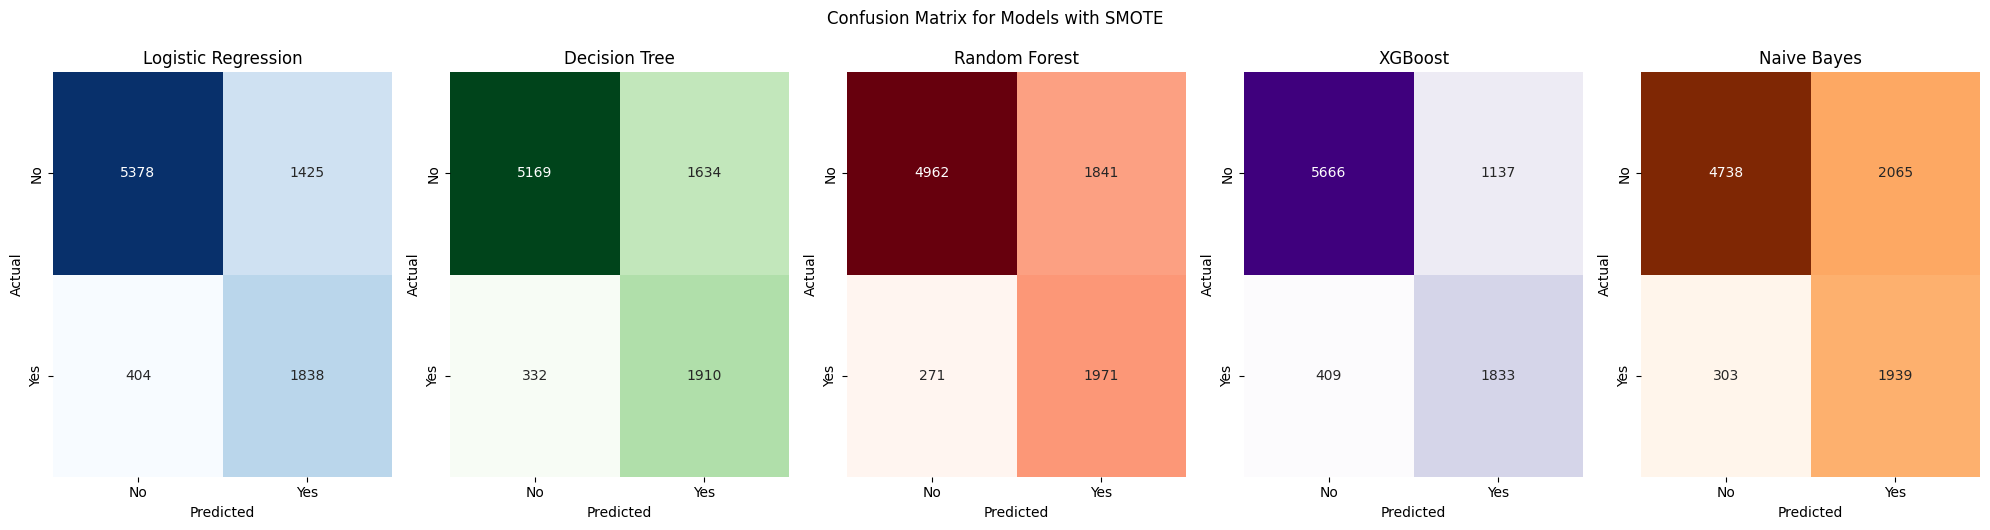

In [153]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  # Gantikan LightGBM
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Normalisasi data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# SMOTE untuk mengatasi imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

# Dictionary model dan parameter terbaik
models = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier,
    'Naive Bayes': GaussianNB  # Ganti LightGBM ke Naive Bayes
}

best_params = {
    'Logistic Regression': {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 100},
    'Decision Tree': {'max_depth': 5, 'min_samples_split': 2},
    'Random Forest': {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2},
    'XGBoost': {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'},
    'Naive Bayes': {}  # GaussianNB tidak punya hyperparameter penting
}

# Simpan hasil prediksi
predict_models = {}

# Loop semua model
for name, model_class in models.items():
    model = model_class(**best_params[name])
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_std)
    predict_models[name] = y_pred

# Visualisasi Confusion Matrix
color_maps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

plt.figure(figsize=(20, 5))
for i, (name, pred) in enumerate(predict_models.items()):
    plt.subplot(1, len(predict_models), i + 1)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_maps[i % len(color_maps)],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cbar=False)
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()

plt.suptitle('Confusion Matrix for Models with SMOTE', y=1.05)
plt.show()


✅ Model dengan Confusion Matrix Terbaik: XGBoost
Karena:

TP cukup tinggi (1833)

FP paling rendah dari semua model (1137)

FN relatif moderat (Jumlah FN tidak terlalu banyak, tapi juga tidak kecil )



#ROC-AUC

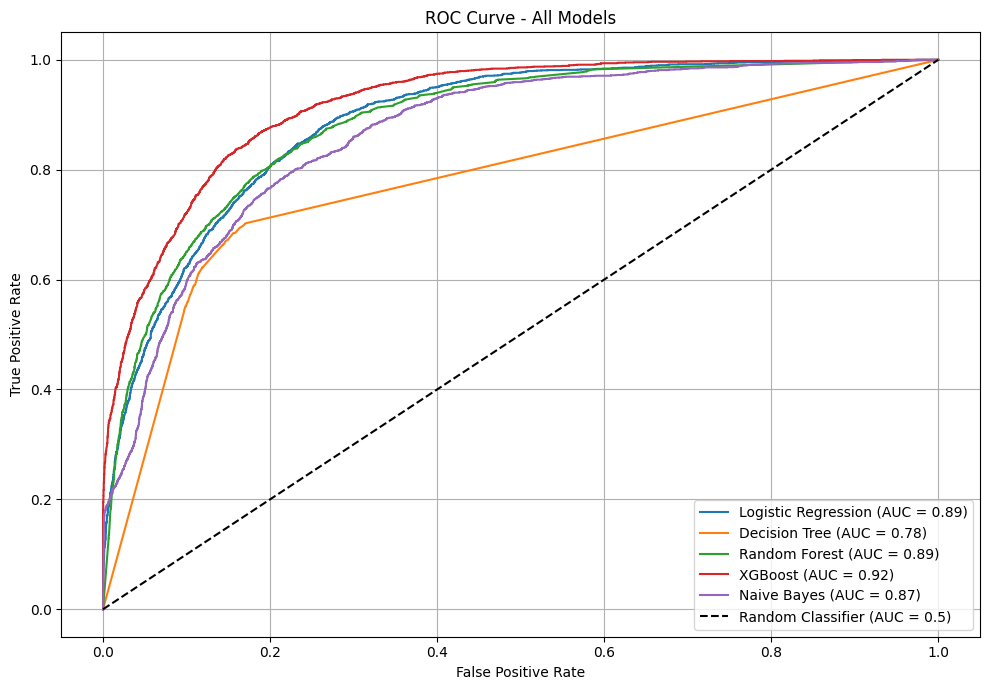

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  # Ganti LightGBM ke Naive Bayes
import numpy as np

# Daftar model sebagai class
models = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier,
    'Naive Bayes': GaussianNB  # Gantikan LightGBM
}

# Fungsi pipeline SMOTE
def create_pipeline_with_smote(model_class):
    smote = SMOTE(random_state=42)
    model = model_class()
    pipeline = ImbPipeline(steps=[
        ('smote', smote),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    return pipeline

# Fungsi plot semua ROC dalam satu grafik
def plot_all_roc_curves(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for name, model_class in models.items():
        pipeline = create_pipeline_with_smote(model_class)
        pipeline.fit(X_train, y_train)

        # Prediksi probabilitas (jika tersedia)
        if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
            y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        else:
            y_scores = pipeline.decision_function(X_test)
            y_pred_proba = (y_scores - np.min(y_scores)) / (np.max(y_scores) - np.min(y_scores))

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - All Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Jalankan fungsi
plot_all_roc_curves(X_train, y_train, X_test, y_test)


✅ Model Terbaik Berdasarkan ROC-AUC: XGBoost
Kenapa?

AUC = 0.92 → menunjukkan bahwa XGBoost sangat baik dalam membedakan antara kelas positif dan negatif.

#Kesimpulan dan Rekomendasi

# Bagian Baru

Penelitian ini bertujuan memprediksi apakah seseorang memiliki pendapatan lebih dari 50.000 USD per tahun berdasarkan data demografis dan pekerjaan. Beberapa algoritma klasifikasi diterapkan, termasuk Logistic Regression, Decision Tree, Random Forest, XGBoost, dan Naive Bayes. Model dilatih menggunakan SMOTE untuk mengatasi ketidakseimbangan kelas, serta standardisasi dan tuning untuk meningkatkan performa.

Hasil menunjukkan bahwa XGBoost adalah model terbaik, dengan metrik evaluasi sebagai berikut:

F1 Score: 0.724 → seimbang dalam mengenali pendapatan tinggi.

Akurasi: 85.22% → akurasi keseluruhan tertinggi.

AUC: 0.92 → sangat baik dalam membedakan kelas pendapatan.

Fitur seperti pendidikan, jenis pekerjaan, status pernikahan, dan jam kerja mingguan terbukti paling berpengaruh terhadap pendapatan, mendukung pentingnya analisis data untuk kebijakan peningkatan kesejahteraan masyarakat.

🔧 Rekomendasi
Gunakan model XGBoost sebagai alat prediksi utama karena memiliki performa terbaik dalam klasifikasi pendapatan dan cocok untuk skenario nyata seperti kebijakan pajak, subsidi, atau targeting pelatihan kerja.

Lakukan analisis lanjutan terhadap fitur penting dari model XGBoost untuk memberikan insight bagi pengambil kebijakan terkait faktor-faktor yang paling menentukan kesejahteraan pendapatan masyarakat.

Perbarui data dan model secara berkala, karena dataset berasal dari tahun 1994. Agar hasil prediksi tetap relevan, penting menggunakan data terbaru yang mencerminkan kondisi sosial ekonomi terkini.

Implementasikan sistem ini dalam bentuk dashboard atau API, agar pemerintah, perusahaan, atau lembaga sosial dapat mengakses prediksi pendapatan masyarakat secara real-time.

Jadikan pendekatan ini sebagai dasar dalam perencanaan intervensi sosial seperti beasiswa, program pemberdayaan perempuan, pelatihan kerja digital, atau perlindungan buruh informal.



#Simpan Model

In [155]:
#import pickle

In [156]:
#import pickle
#from imblearn.pipeline import Pipeline as ImbPipeline
#from sklearn.preprocessing import StandardScaler
#from xgboost import XGBClassifier

# Define the best parameters for XGBoost from the hyperparameter tuning
#best_xgb_params = best_params_permodel['XGBOOST']

# Create and train the XGBoost model with the best parameters within a pipeline
# The pipeline includes SMOTE and StandardScaler as used during evaluation
#xgb_model = ImbPipeline(steps=[
#    ('smote', SMOTE(random_state=42)),
#    ('scaler', StandardScaler()),
#    ('classifier', XGBClassifier(**best_xgb_params))
#])

# Fit the pipeline on the training data
#xgb_model.fit(X_train, y_train)

# Now, save the trained pipeline (which includes the XGBoost model)
#filename = 'Adult_Model.sav'
#pickle.dump(xgb_model, open(filename, 'wb'))
#print(f"Model saved successfully as {filename}")

In [157]:
#from google.colab import files
#files.download('Adult_Model.sav')

In [173]:
# Fit scaler ke training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Simpan model & scaler
joblib.dump(xgb_model, 'xgb_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [175]:
# Download
from google.colab import files
files.download('xgb_model.joblib')
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
import joblib

In [159]:
joblib.dump(xgb_model, 'xgb_model.joblib') #menyimpan data untuk deployment
print('success')

success


In [160]:
joblib.dump(scaler, 'scaler.joblib') #menyimpan data untuk deployment
print('success')

success


In [164]:
from google.colab import files
files.download('xgb_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
from google.colab import files
files.download('xgb_model.joblib')
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
!cp xgb_model.joblib /content/drive/MyDrive/
